# Exercise 3: Contours

In this exercise you will:
- Understand what contours are.
- Learn to find contours, draw contours, etc.
- Use the OpenCV functions [cv.findContours()](https://docs.opencv.org/4.6.0/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0) and [cv.drawContours()](https://docs.opencv.org/4.6.0/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc).
- Find different features of contours, such as area, perimeter, centroid, bounding box, etc.

As a first step, let's import the python modules we need.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Getting Started with Contours

https://docs.opencv.org/4.6.0/d4/d73/tutorial_py_contours_begin.html

### What are contours?

Contours can be explained simply as a curve joining all the continuous points (along the boundary) of an object, having the same color or intensity. Contours are a useful tool for shape analysis, and object detection and recognition.

### Finding contours

In OpenCV, finding contours is like finding white objects in an image with a black background. Therefore, binary images should be used, where the object(s) to be found should be white, and the background should be black. So, before finding contours, apply e.g. thresholding and/or Canny edge detection. For example, the following OpenCV functions will produce a binary image from a grayscale or color image: [cv.compare()](https://docs.opencv.org/4.6.0/d2/de8/group__core__array.html#ga303cfb72acf8cbb36d884650c09a3a97), [cv.inRange()](https://docs.opencv.org/4.6.0/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981), [cv.threshold()](https://docs.opencv.org/4.6.0/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57), [cv.adaptiveThreshold()](https://docs.opencv.org/4.6.0/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3), [cv.Canny()](https://docs.opencv.org/4.6.0/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de).

OpenCV provides the function [cv.findContours()](https://docs.opencv.org/4.6.0/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0) for finding contours in a binary image.

`findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> contours, hierarchy`
- `image` is the 8-bit single-channel binary image (a non-zero pixel is treated as a 1).
- `mode` is the contour [retrieval mode](https://docs.opencv.org/4.6.0/d3/dc0/group__imgproc__shape.html#ga819779b9857cc2f8601e6526a3a5bc71), e.g. `cv.RETR_TREE`.
- `method` is the contour [approximation method](https://docs.opencv.org/4.6.0/d3/dc0/group__imgproc__shape.html#ga4303f45752694956374734a03c54d5ff), e.g. `cv.CHAIN_APPROX_SIMPLE`.
- `offset` (optional) is the offset by which every contour point is shifted.

The function returns two values:
- `contours` is a Python list of all the contours in the image, where each individual contour is a Numpy array consisting of the (x,y) coordinates of the boundary points of a specific object.
- `hierarchy` contains information about the image topology. For each $i^{th}$ contour `contours[i]`, the elements `hierarchy[i][0]`, `hierarchy[i][1]`, `hierarchy[i][2]` and `hierarchy[i][3]` contain zero-based contour indices of the below (-1 if one doesn't exist):
  - `hierarchy[i][0]`: the next (sibling) contour at the same hierarchical level.
  - `hierarchy[i][1]`: the previous (sibling) contour at the same hierarchical level.
  - `hierarchy[i][2]`: the first child contour.
  - `hierarchy[i][3]`: the parent contour.

### Drawing contours

To draw the contours on an image, the [cv.drawContours()](https://docs.opencv.org/4.6.0/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc) function is used. It can also be used to draw any shape provided you have the shape's boundary points.

`drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]]) -> image`
- `image` is the image to draw on.
- `contours` is the second argument is the Python list of contours to be drawn. 
- `contourIdx` is a an index in `contours`, to draw a single contour (-1 = draw all contours).
- `color` is the color of the drawn contours, e.g. (127,127,127).
- `thickness` (optional) is the line thickness of the drawn contours, e.g. 1.
- `lineType` (optional) is the line type, e.g. .
- `hierarchy` (optional) is the information about hierarchy.
- `maxLevel` (optional) is the max level for drawn contours (is `hierarchy` is supplied):
  - if 0, only the specified contour is drawn.
  - if 1, the function draws the contour(s) and all the nested contours.
  - if 2, like the previous maxLevel, but includes the nested contours, nested contours.
  - etc ...
- `offset` (optional) shifts all the drawn contours by the specified value (dx,dy).

For example, to draw the contours in a gray color of thickness 1:
- `cv.drawContours(img, contours, -1, (127,127,127), 1)` (-1 = draw all contours).
- `cv.drawContours(img, contours, 0, (127,127,127), 1)` (0 = draw the first contour).
- `cv.drawContours(img, [contours[0]], 0, (127,127,127), 1)` (draw the first contour again).

---

Let's see a simple example with a white square and a line on a black background.

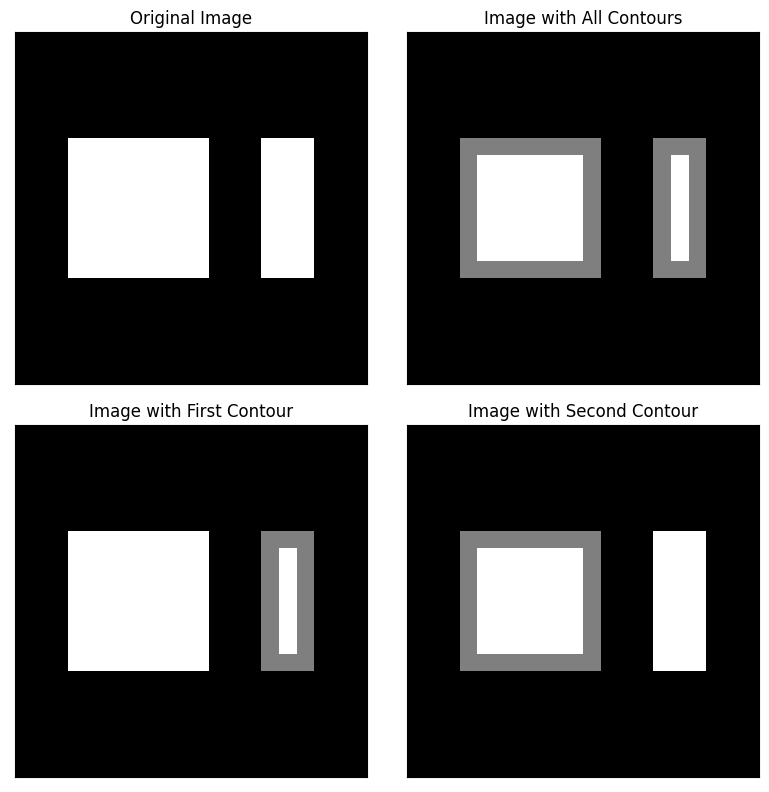

In [2]:
# Create a simple binary image (white square, white line, black background).
# Remember to create a binary image if you load an arbitrary image.
img = np.zeros((20,20), dtype=np.uint8)
img[6:-6,3:-9] = np.ones((8,8), dtype=np.uint8) * 255
img[6:-6,-6:-3] = np.ones((8,3), dtype=np.uint8) * 255

# Find all the contours in the binary image
contours, hierarchy = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Draw all the contours
# (in gray with a line thickness of 1):
img_all_contours =  img.copy()
cv.drawContours(img_all_contours, contours, -1, (127,127,127), 1)

# Only draw the first contour, i.e. index=0
# (in gray with a line thickness of 1):
img_first_contour =  img.copy()
cv.drawContours(img_first_contour, contours, 0, (127,127,127), 1)

# Only draw the second contour, i.e. index=1 (other way of choosing an index)
# (in gray with a line thickness of 1):
img_second_contour =  img.copy()
cnt = contours[1]
cv.drawContours(img_second_contour, [cnt], 0, (127,127,127), 1)

# Plot the original image and the image with the drawn contours
plt.figure(figsize=(8,8))

plt.subplot(221), plt.imshow(img, cmap="gray"),
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(img_all_contours, cmap="gray"),
plt.title('Image with All Contours'), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(img_first_contour, cmap="gray"),
plt.title('Image with First Contour'), plt.xticks([]), plt.yticks([])

plt.subplot(224), plt.imshow(img_second_contour, cmap="gray"),
plt.title('Image with Second Contour'), plt.xticks([]), plt.yticks([])

plt.tight_layout(pad=1.0)
plt.show()

### Contour Approximation Method

The third argument `method` to the `cv.findContours()` function is the contour [approximation method](https://docs.opencv.org/4.6.0/d3/dc0/group__imgproc__shape.html#ga4303f45752694956374734a03c54d5ff) (in the example above we used a value of `cv.CHAIN_APPROX_SIMPLE`). When contours are found, the function stores the (x,y) coordinates of the boundary points of a shape. But does it store all the coordinates? That depends on the chosen contour approximation method:
- `cv.CHAIN_APPROX_NONE`: stores all the contour points.
- `cv.CHAIN_APPROX_SIMPLE`: compresses horizontal, vertical, and diagonal segments and leaves only their end points (e.g. only 4 points are used for a rectangular contour).
- `cv.CHAIN_APPROX_TC89_L1`: applies one version of the "Teh-Chin" algorithm.
- `cv.CHAIN_APPROX_TC89_KCOS`: applies another version of the "Teh-Chin" algorithm.

Let's look at an example, where we compare `cv.CHAIN_APPROX_NONE` and `cv.CHAIN_APPROX_SIMPLE` for a square object.

cv.CHAIN_APPROX_NONE uses 28 points for a rectangular contour.
cv.CHAIN_APPROX_SIMPLE uses 4 points for a rectangular contour.


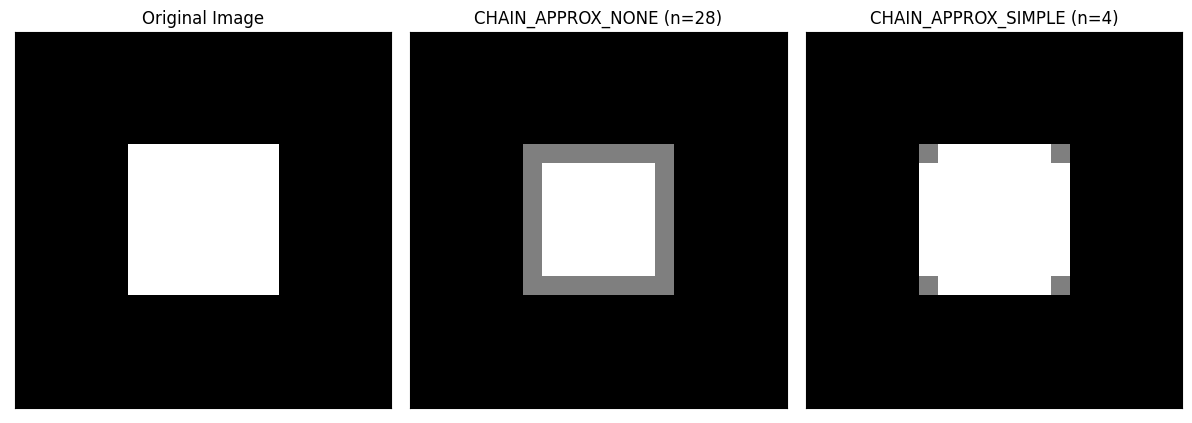

In [3]:
# Create a simple binary image (white square on black background).
img = np.zeros((20,20), dtype=np.uint8)
img[6:-6,6:-6] = np.ones((8,8), dtype=np.uint8) * 255

# Find all the contours in the binary image using 'cv.CHAIN_APPROX_NONE'
contours_none, _ = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Find all the contours in the binary image using 'cv.CHAIN_APPROX_SIMPLE'
contours_simple, _ = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Print out the number of points used to represent each contour
n_contours_none = len(contours_none[0])
n_contours_simple = len(contours_simple[0])
print(f'cv.CHAIN_APPROX_NONE uses {n_contours_none} points for a rectangular contour.')
print(f'cv.CHAIN_APPROX_SIMPLE uses {n_contours_simple} points for a rectangular contour.')

# Draw a gray pixel for each contour point found with 'cv.CHAIN_APPROX_NONE':
img_contours_none =  img.copy()
coordinates = [(point[0][0], point[0][1]) for point in contours_none[0]]
for x,y in coordinates:
    img_contours_none[x,y] = 127

# Draw a gray pixel for each contour point found with 'cv.CHAIN_APPROX_SIMPLE':
img_contours_simple =  img.copy()
coordinates = [(point[0][0], point[0][1]) for point in contours_simple[0]]
for x,y in coordinates:
    img_contours_simple[x,y] = 127

# Plot the original image and the image with the drawn contours
plt.figure(figsize=(12,12))

plt.subplot(131), plt.imshow(img, cmap="gray"),
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(img_contours_none, cmap="gray"),
plt.title(f'CHAIN_APPROX_NONE (n={n_contours_none})'),
plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(img_contours_simple, cmap="gray"),
plt.title(f'CHAIN_APPROX_SIMPLE (n={n_contours_simple})'),
plt.xticks([]), plt.yticks([])

plt.tight_layout(pad=1.0)
plt.show()

## Contour Features

https://docs.opencv.org/4.6.0/dd/d49/tutorial_py_contour_features.html

### 1. Moments

[Image moments](https://en.wikipedia.org/wiki/Image_moment) help you to calculate a number of object features, such as the center of mass of the object, the area of the object, etc.

The function [cv.moments()](https://docs.opencv.org/4.6.0/d3/dc0/group__imgproc__shape.html#ga556a180f43cab22649c23ada36a8a139) calculates moments (up to the $3^{rd}$ order) for an object, given the object's contour points (an array of 2D points), and returns the moment values in a Python dictionary.

`cv.moments(array[, binaryImage]) -> retval`
- `array` is an array of points, e.g. `contours[0]` from `contours` returned by `cv.findContours()`.
- `binaryImage` (optional) is a boolean, and if `True`, all non-zero pixels are treated as `1`.

The dictionary of moment values is returned in `retval`, where the dictionary keys are:

'm00' , 'm10' , 'm01',

'm11' , 'm20' , 'm02' , 'm21' , 'm12' , 'm30' , 'm03',

'mu11', 'mu20', 'mu02', 'mu21', 'mu12', 'mu30', 'mu03',

'nu11', 'nu20', 'nu02', 'nu21', 'nu12', 'nu30', 'nu03'

Let's look at how to do this in code.

In [4]:
# Create a simple image with a white square on a black background
img = np.zeros((148, 209), dtype=np.uint8)
img[15:-12,11:-15] = 255

# Threshold to get a binary
# (not really necessary for this image)
ret, thresh = cv.threshold(img, 127, 255, 0)

# Get all contours in the image
contours, hierarchy = cv.findContours(thresh, 1, 2)

# Let's look at the first contour
contour = contours[0]

# Calculate the moments for this contour (object)
moments = cv.moments(contour)

# Print out the moments for this contour (object)
print(f'The moments for this contour are:\n\n{moments}\n')

The moments for this contour are:

{'m00': 21840.0, 'm10': 2227680.0, 'm01': 1638000.0, 'm20': 287509040.0, 'm11': 167076000.0, 'm02': 149058000.0, 'm30': 41624200800.0, 'm21': 21563178000.0, 'm12': 15203916000.0, 'm03': 15110550000.0, 'mu20': 60285680.0, 'mu11': 0.0, 'mu02': 26208000.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.12638888888888888, 'nu11': 0.0, 'nu02': 0.054945054945054944, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}



### 2. Contour Centroid

Once we have the moments for a contour, we can extract useful features, such as the object's area, centroid, etc.

For example, an object's centroid $(C_x, C_y)$ is calculated as $C_x = \frac{M_{10}}{M_{00}}$ and $C_y = \frac{M_{01}}{M_{00}}$.

Let's use the moments to calculate the centroid, and plot the contour together with its centroid.

This object's centroid is located at (Cy,Cx) = (75,102)


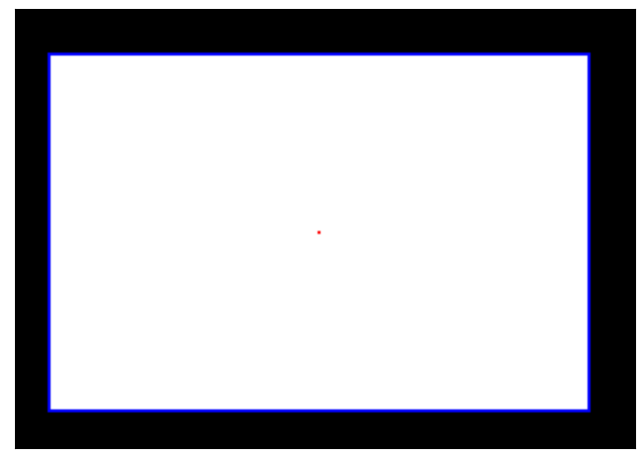

In [7]:
# Calculate the object's centroid
Cx = int(moments['m10']/moments['m00'])
Cy = int(moments['m01']/moments['m00'])

# Print out the object's centroid
print(f"This object's centroid is located at (Cy,Cx) = ({Cy},{Cx})")

# Let's turn the binary single-channel image into
# a three-channel b,g,r image, so we can draw the
# contour and centroid in blue and red respectively
img_centroid = img.copy()
img_centroid = np.stack((img_centroid,)*3, axis=-1)

# Draw the contour on the image, in blue
cv.drawContours(img_centroid, [contour], 0, (255,0,0), 1)

# Draw the centroid on the image, in red
img_centroid[Cy,Cx] = (0,0,255)

# Plot the image with its contour and centroid
plt.figure(figsize=(8,8))
plt.imshow(img_centroid[:,:,::-1])
plt.xticks([]), plt.yticks([])
plt.show()

### 3. Contour Area

A object's area (in pixels) is simply the value of the $0^{th}$ moment, i.e. $M_{00}$ or 'm00', but can also be calculated using the OpenCV function [cv.contourArea()](https://docs.opencv.org/4.6.0/d3/dc0/group__imgproc__shape.html#ga2c759ed9f497d4a618048a2f56dc97f1).

`cv.contourArea(contour[, oriented]) -> retval`
- `contour` is the contour (2D array of contour points).
- `oriented` (optional) is a boolean flag (default=`False`), and if `True` returns a signed area, depending on the contour orientation (clockwise or counter-clockwise), which can be used to determine the orientation of a contour.

The area is returned in `retval`.

In [8]:
# The zero'th moment is the area of the object
area = moments['m00']
print(f"Area from moments['m00']: {area}")

# We can also obtain the area from 'cv.contourArea()'
area = cv.contourArea(contour)
print(f"Area from cv.contourArea(contour): {area}")

Area from moments['m00']: 21840.0
Area from cv.contourArea(contour): 21840.0


### 4. Contour Perimeter

The perimeter of an object, or the arc length or a curve, can be found using the OpenCV function [cv.arcLength()](https://docs.opencv.org/4.6.0/d3/dc0/group__imgproc__shape.html#ga8d26483c636be6b35c3ec6335798a47c).

`cv.arcLength(curve, closed) -> retval`
- `curve` is an array of 2D points (e.g. a contour).
- `closed` is a boolean flag indicating whether the curve is closed or not:
  - `False`: arc length of a curve ("open curve").
  - `True`: perimeter of an object ("closed curve").

The perimeter (or curve length) is returned in `retval`.

In [7]:
perimeter = cv.arcLength(contour, True)
print(f"The object's perimeter is: {perimeter}")

The object's perimeter is: 604.0


### 5. Contour Approximation

The OpenCV function [cv.approxPolyDP()](https://docs.opencv.org/4.6.0/d3/dc0/group__imgproc__shape.html#ga0012a5fdaea70b8a9970165d98722b4c) can be used to approximate a contour shape to another shape (e.g. a rectangle) with a less number of vertices depending upon the precision `epsilon` we specify. The function implements the [Douglas-Peucker algorithm](https://en.wikipedia.org/wiki/Ramer%E2%80%93Douglas%E2%80%93Peucker_algorithm).

`cv.approxPolyDP(curve, epsilon, closed[, approxCurve]) -> approxCurve`
- `curve` is an array of 2D points (e.g. a contour).
- `epsilon` is a parameter specifying the approximation accuracy (see explaination below).
- `closed` is a boolean flag indicating whether the curve is closed or not.

The approximated curve is returned in `approxCurve`.

Consider a scenario where you are trying to find a square in an image, but due to some complications in the image (noise, occlusion, etc), you didn't get a perfect square, but ended up with a "bad shape" instead (as shown in the left image below). In this case, you can use the `cv.approxPolyDP()` function to approximate the shape. The fuction's second argument `epsilon` is an accuracy parameter that determines the maximum distance between the original contour (curve) and the approximated contour (curve). A wise selection of `epsilon` is needed to get a good result.

The left imge below shows the original contour in blue. In the middle image, an approximated contour is shown in green using `epsilon` = 10% of the original contour's arc length. In the right image, an approximated contour is shown in red using `epsilon` = 1% of the original contour's arc length.

<img src="../notebook_images/contour_approximation.png">

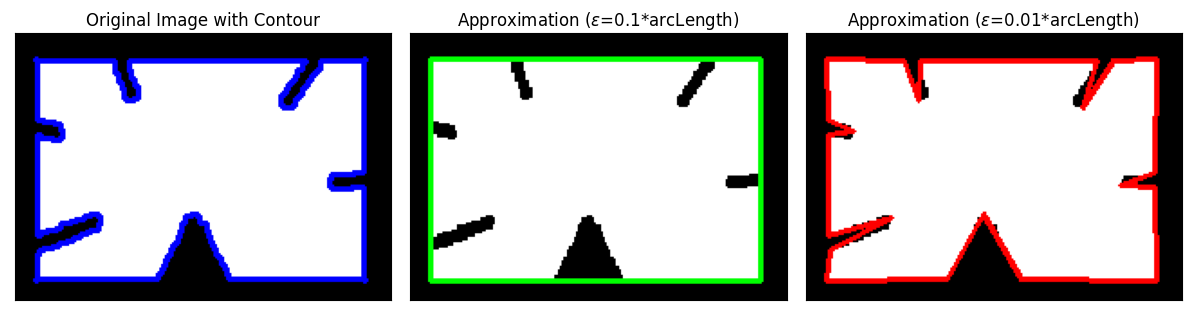

In [8]:
# Read in an image and threshold it. The compute
# the contours, and select the first contour.
img = cv.imread('../data/contour.png', 0)
ret, thresh = cv.threshold(img, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, 1, 2)
contour = contours[0]

# Let's set epsilon1 to 10% of the original contour length
epsilon1 = 0.1 * cv.arcLength(contour, True)
approx1 = cv.approxPolyDP(contour, epsilon1, True)

# Let's set epsilon2 to 10% of the original contour length
epsilon2 = 0.01 * cv.arcLength(contour, True)
approx2 = cv.approxPolyDP(contour, epsilon2, True)

# Let's turn the binary single-channel image into a 3-channel
# b,g,r image, so we can draw the contours in color
img_original = img.copy()
img_original = np.stack((img_original,)*3, axis=-1)
img_approx1 = img_original.copy()
img_approx2 = img_original.copy()

# Draw the contours on the image:
# - Original contour (blue)
# - Approximated contour with epsilon1 (green)
# - Approximated contour with epsilon2 (red)
cv.drawContours(img_original, [contour], 0, (255,0,0), 2)
cv.drawContours(img_approx1, [approx1], 0, (0,255,0), 2)
cv.drawContours(img_approx2, [approx2], 0, (0,0,255), 2)

# Plot the image with its contours
plt.figure(figsize=(12,12))

plt.subplot(131), plt.imshow(img_original[:,:,::-1])
plt.title('Original Image with Contour'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(img_approx1[:,:,::-1])
plt.title('Approximation ($\epsilon$=0.1*arcLength)'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(img_approx2[:,:,::-1])
plt.title('Approximation ($\epsilon$=0.01*arcLength)'), plt.xticks([]), plt.yticks([])

plt.tight_layout(pad=1.0)
plt.show()

### 6. Convex Hull

<img width="200" height="200" src="../notebook_images/convexitydefects.jpg" style="padding-left: 10px; float: right;">

A Convex Hull will look similar to a contour approximation, but they are not the same thing (both may give the same results in some cases). OpenCV's [cv.convexHull()](https://docs.opencv.org/4.6.0/d3/dc0/group__imgproc__shape.html#ga014b28e56cb8854c0de4a211cb2be656) function checks a curve for *convexity defects* and corrects it. Generally speaking, convex curves are curves that always *bulge outwards*, or at-least are *flat*. If a curve *bulges inwards*, it is called a *convexity defect*. For example, in the figure to the right, the red line shows the convex hull of a hand. The double-sided arrow shows the convexity defects, which are the local maximum deviations of the hull from the contour.

`cv.convexHull(points[, hull[, clockwise[, returnPoints]]]) -> hull`
- `points` is an array of 2D points (e.g. a contour).
- `clockwise` is an orientation flag, and if `True`, the output convex hull is oriented clockwise (otherwise counter-clockwise). The assumed coordinate system has its X axis pointing to the right, and its Y axis pointing upwards.
- `returnPoints` is a boolean flag. If `True` (default), it returns the coordinates of the hull points. If `False`, it returns the indices of the contour `points` corresponding to the hull points.

The function returns the convex hull in `hull`.

To get a convex hull, the following is sufficient: `hull = cv.convexHull(contour)`

But, if you want to find convexity defects, you need to use `returnPoints = False`. Consider the "bad image" of rectangle used in the previous example, and assume we have already found its single contour and stored it in `contour`. Assume `cv.convexHull()` with `returnPoints = True` (default) returns the `hull` with the following values: $[[[194 \;\; 14], [[194 \;\; 137]], [[11 \;\; 137]], [[11 \;\; 14]]]$ which are the rectangle's four corner points. Now, if `cv.convexHull()` is called once again, but with  `returnPoints = False`, the function returns the following values: $[[145], [130], [68], [0]]$. These are the indices of the corresponding points in `contour`, i.e. `contour[145]` would return $[[194 \;\; 14]]$.

In [9]:
# Get the convex hull for the "bad" contour
hull = cv.convexHull(contour)
print(f'hull:\n{hull}\n')

# Get the indicies (returnPoints=False)
indices = cv.convexHull(contour, returnPoints=False)
print(f'indices:\n{indices}\n')

# Use the first index to get the corresponding contour point
print(f'The first index is: {indices[0][0]}\n')
print(f'The first index corresponds to contour point: {contour[ indices[0][0] ]}')

hull:
[[[194  14]]

 [[194 137]]

 [[ 11 137]]

 [[ 11  14]]]

indices:
[[145]
 [130]
 [ 68]
 [  0]]

The first index is: 145

The first index corresponds to contour point: [[194  14]]


### 7. Checking Convexity

The OpenCV function [cv.isContourConvex()](https://docs.opencv.org/4.6.0/d3/dc0/group__imgproc__shape.html#ga8abf8010377b58cbc16db6734d92941b) can be used to check is a contour is convex or not. It accepts the `contour` as its only input argument and returns `True` or `False` in `retval`:

`cv.isContourConvex(contour) -> retval`

In [10]:
# Check if the contour is convex
isConvex = cv.isContourConvex(contour)
print(f'The contour is convex: {isConvex}')

# Check if the convex hull is convex (obviously true)
isConvex = cv.isContourConvex(hull)
print(f'The convex hull is convex: {isConvex}')

The contour is convex: False
The convex hull is convex: True


### 8. Bounding Rectangle

A bounding rectangle for an object, is a minimum rectangle that includes the entire object within itself. There are two types of bounding rectangles.

#### 8.a. Straight Bounding Rectangle

A *straight bounding rectangle* is a rectangle that doesn't consider any rotation of the object, or expressed in another way, the bounding rectangle's sides are parallel with the x and y axes. So, the area of the bounding rectangle isn't guaranteed to be a minimum. The bounding rectangle can be found with the OpenCV function [cv.boundingRect()](https://docs.opencv.org/4.6.0/d3/dc0/group__imgproc__shape.html#ga103fcbda2f540f3ef1c042d6a9b35ac7).

`cv.boundingRect(array) -> retval`
- `array` is an array of 2D points (e.g. a contour).

The return value `retval` is a Python tuple `(x, y, w, h)`, where `(x,y)` is the top-left  coordinate of the rectangle, `w` is its width, and `h` is its height.

We can e.g. use the `cv.rectangle()` function to draw the bounding box on an image:

`cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)`

#### 8.b. Rotated Bounding Rectangle

A *rotated bounding rectangle* does consider the rotation of the bounding box. So, it guarantees the bounding box has the minimum area. The rotated bounding rectangle can be found with the OpenCV function [cv.minAreaRect()](https://docs.opencv.org/4.6.0/d3/dc0/group__imgproc__shape.html#ga3d476a3417130ae5154aea421ca7ead9). It also takes a 2D point array (contour) as its input argument `points`, but its return value `retval` contains a Box2D structure as a tuple: `((center x,center y), (width,height), angle of rotation)`.

`cv.minAreaRect(points) -> retval`

So we get the center coordinate of the bounding box, its width and height, and the angle of rotation. But, to draw the rectangle (with e.g. `cv.drawContours()`), we need its 4 corner points. We can convert the Box2D structure to an array of 2D points (i.e. the same structure as a contour) using the OpenCV function [cv.boxPoints()](https://docs.opencv.org/4.6.0/d3/dc0/group__imgproc__shape.html#gaf78d467e024b4d7936cf9397185d2f5c), as shown below:

`rect = cv.minAreaRect(cnt)`  
`box = cv.boxPoints(rect)`  
`box = np.int0(box)`  (this converts float values to int values)  
`cv.drawContours(img,[box],0,(0,0,255),2)`


---

Let's look at an example where we compute both types of bounding boxes.

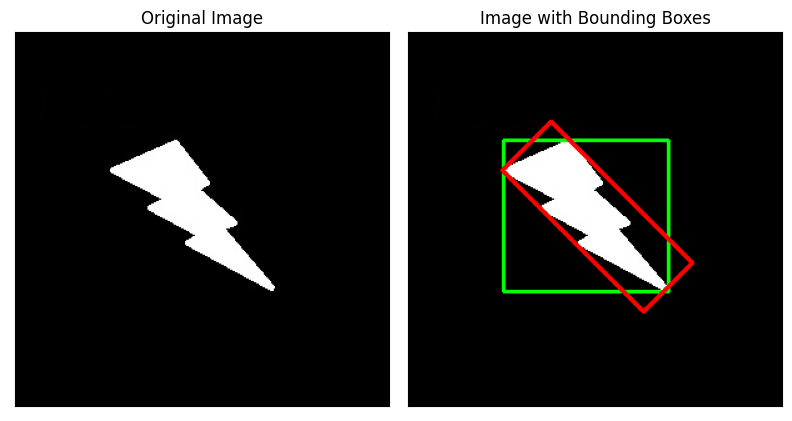

In [11]:
# Read in an image, convert it to grayscale,
# and threshold it to get a binary image
img = cv.imread('../data/bolt.png')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, img_binary = cv.threshold(img_gray, 127, 255, 0)

# Find the contours, and select the first contour
contours, _ = cv.findContours(img_binary, 1, 2)
contour = contours[0]

# Create a copy of the image to draw on
img_bounding_box = img.copy()

# Get the bounding box for the contour, and draw
# it in green on the copy of the original image
x, y, w, h = cv.boundingRect(contour)
cv.rectangle(img_bounding_box, (x,y), (x+w,y+h), (0,255,0), 2)

# Get the minimum bounding box for the contour, and draw
# it in red on the copy of the original image
rect = cv.minAreaRect(contour)
box = cv.boxPoints(rect)
box = np.int0(box) # convert from float box to int box
cv.drawContours(img_bounding_box, [box], 0, (0,0,255), 2)

# Plot the original image and the image with the bounding boxes
plt.figure(figsize=(8,8))

plt.subplot(121), plt.imshow(img[:,:,::-1]),
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(img_bounding_box[:,:,::-1]),
plt.title('Image with Bounding Boxes'), plt.xticks([]), plt.yticks([])

plt.tight_layout(pad=1.0)
plt.show()

### 9. Minimum Enclosing Circle

we can also create an enclosing (bounding) circle using the OpenCV function [cv.minEnclosingCircle()](https://docs.opencv.org/4.6.0/d3/dc0/group__imgproc__shape.html#ga8ce13c24081bbc7151e9326f412190f1), i.e. a circle, with minimum area, that completely encloses the object within it.

`cv.minEnclosingCircle(points) -> center, radius`
- `points` is an array of 2D points (e.g. a contour).

The function returns the cicle's `center` coordinates (x,y) and `radius`.

We can draw the circle on an image with the `cv.circle()` function, e.g.:

Let's look at an example.

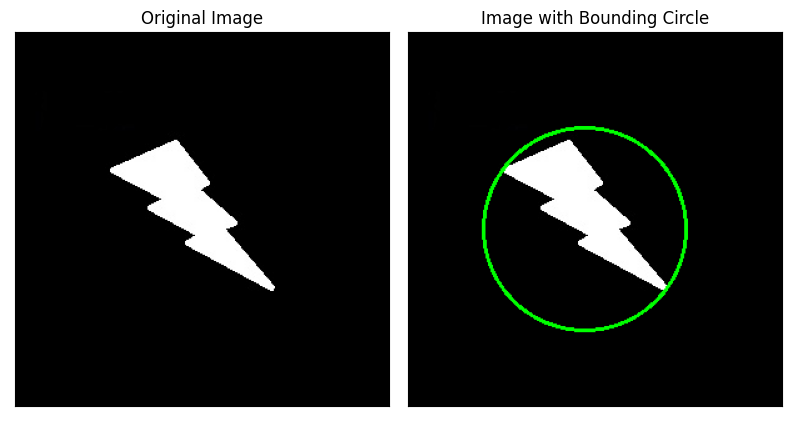

In [12]:
# Get the enclosing circle's center coordinates and radius
(x,y) , radius = cv.minEnclosingCircle(contour)
center = (int(x), int(y))
radius = int(radius)

# Draw the bounding circle on a copy of the original image
img_bounding_circle = img.copy()
cv.circle(img_bounding_circle, center, radius, (0,255,0), 2)

# Plot the original image and the image with the bounding circle
plt.figure(figsize=(8,8))

plt.subplot(121), plt.imshow(img[:,:,::-1]),
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(img_bounding_circle[:,:,::-1]),
plt.title('Image with Bounding Circle'), plt.xticks([]), plt.yticks([])

plt.tight_layout(pad=1.0)
plt.show()

### 10. Fitting an Ellipse

We can fit an ellipse to an object using the OpenCV function [cv.fitEllipse()](https://docs.opencv.org/4.6.0/d3/dc0/group__imgproc__shape.html#gaf259efaad93098103d6c27b9e4900ffa). It returns the rotated rectangle in which the ellipse is inscribed.

`cv.fitEllipse(points) -> retval`
- `points` is an array of 2D points (e.g. a contour).

The function returns the rotated rectangle in `retval`, in which the ellipse is inscribed.

We can draw the ellipse on an image with the (overloaded) OpenCV function below, where we pass the return value `retval` from `cv.fitEllipse()` as the second parameter `box` to `cv.ellipse()`.

`cv.ellipse(img, box, color[, thickness[, lineType]]) -> img`

Let's look at an example.

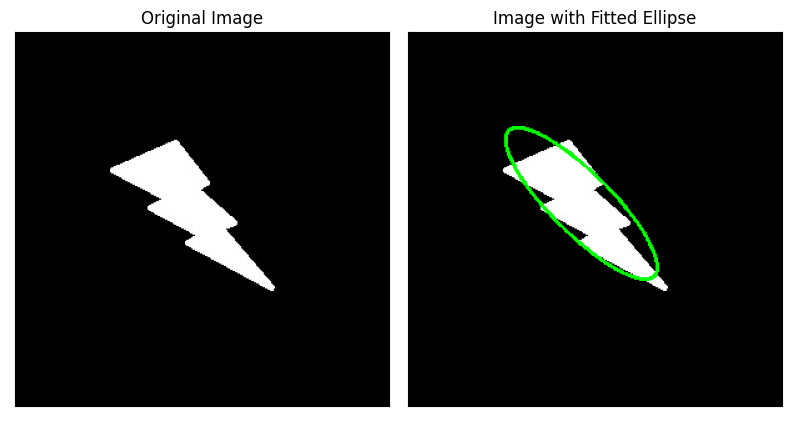

In [13]:
# Get the fitted ellipse (rotated rectangle)
ellipse = cv.fitEllipse(contour)

# Draw the fitted ellipse on a copy of the original image
img_fitted_ellipse = img.copy()
cv.ellipse(img_fitted_ellipse, ellipse, (0,255,0), 2)

# Plot the original image and the image with the fitted ellipse
plt.figure(figsize=(8,8))

plt.subplot(121), plt.imshow(img[:,:,::-1]),
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(img_fitted_ellipse[:,:,::-1]),
plt.title('Image with Fitted Ellipse'), plt.xticks([]), plt.yticks([])

plt.tight_layout(pad=1.0)
plt.show()

### 11. Fitting a Line
Similarly we can fit a line to a set of points. The object (contour) we are working with contains a set of white points. We can approximate a straight line to the object (contour) using the OpenCV function [cv.fitLine()](https://docs.opencv.org/4.6.0/d3/dc0/group__imgproc__shape.html#gaf849da1fdafa67ee84b1e9a23b93f91f).

`cv.fitLine(points, distType, param, reps, aeps[, line]) -> line`
- `points` is an array of 2D points (e.g. a contour).
- `distType` is the [distance type](https://docs.opencv.org/4.6.0/d7/d1b/group__imgproc__misc.html#gaa2bfbebbc5c320526897996aafa1d8eb) used by the estimator, e.g. `cv.DIST_L2`.
- `param` is a parameter $C$ for some `distType` settings ($C=0$ means an optimal value is chosen).
- `reps` is the accuracy for the radius, where `0.01` is a good default value.
- `aeps`is the accuracy for the angle, , where `0.01` is a good default value.

The function returns a 4-tuple `(vx, vy, x0, y0)` in `line`, where `(vx, vy)` is a normalized vector collinear to the line, and `(x0, y0)` is a point on the line.

We can draw the line with the `cv.line()` function.

Let's look at an example.

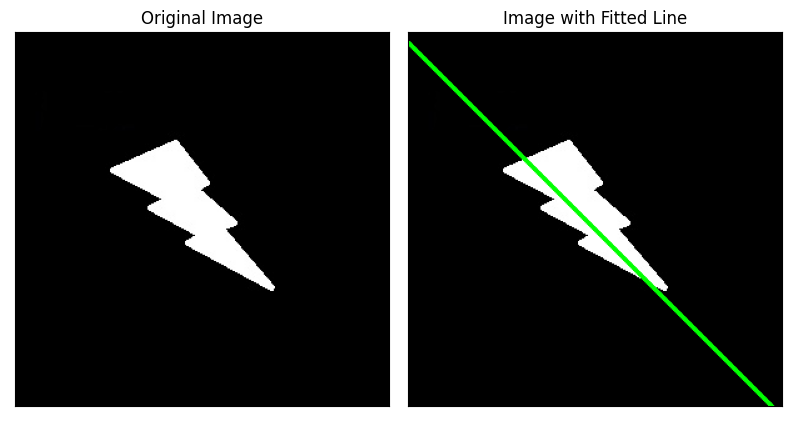

In [14]:
# Get the fitted line
[vx,vy,x,y] = cv.fitLine(contour, cv.DIST_L2, 0, 0.01, 0.01)
rows, cols = img.shape[:2]
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)

# Draw the fitted line on a copy of the original image
img_fitted_line = img.copy()
cv.line(img_fitted_line, (cols-1,righty), (0,lefty), (0,255,0), 2)

# Plot the original image and the image with the fitted line
plt.figure(figsize=(8,8))

plt.subplot(121), plt.imshow(img[:,:,::-1]),
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(img_fitted_line[:,:,::-1]),
plt.title('Image with Fitted Line'), plt.xticks([]), plt.yticks([])

plt.tight_layout(pad=1.0)
plt.show()

## More on Contours

For more information about Contours in OpenCV see:
- Contour Properties  
https://docs.opencv.org/4.6.0/d1/d32/tutorial_py_contour_properties.html
- More Functions  
https://docs.opencv.org/4.6.0/d5/d45/tutorial_py_contours_more_functions.html
- Contours Hierarchy  
https://docs.opencv.org/4.6.0/d9/d8b/tutorial_py_contours_hierarchy.html